RETAIL SALES EXPLORATORY DATA ANALYSIS

1. DATA LOADING AND CLEANING
----------------------------------------
Dataset shape: (1000, 9)
Columns: ['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None

First 5 rows:
   Transaction ID        Date Cust

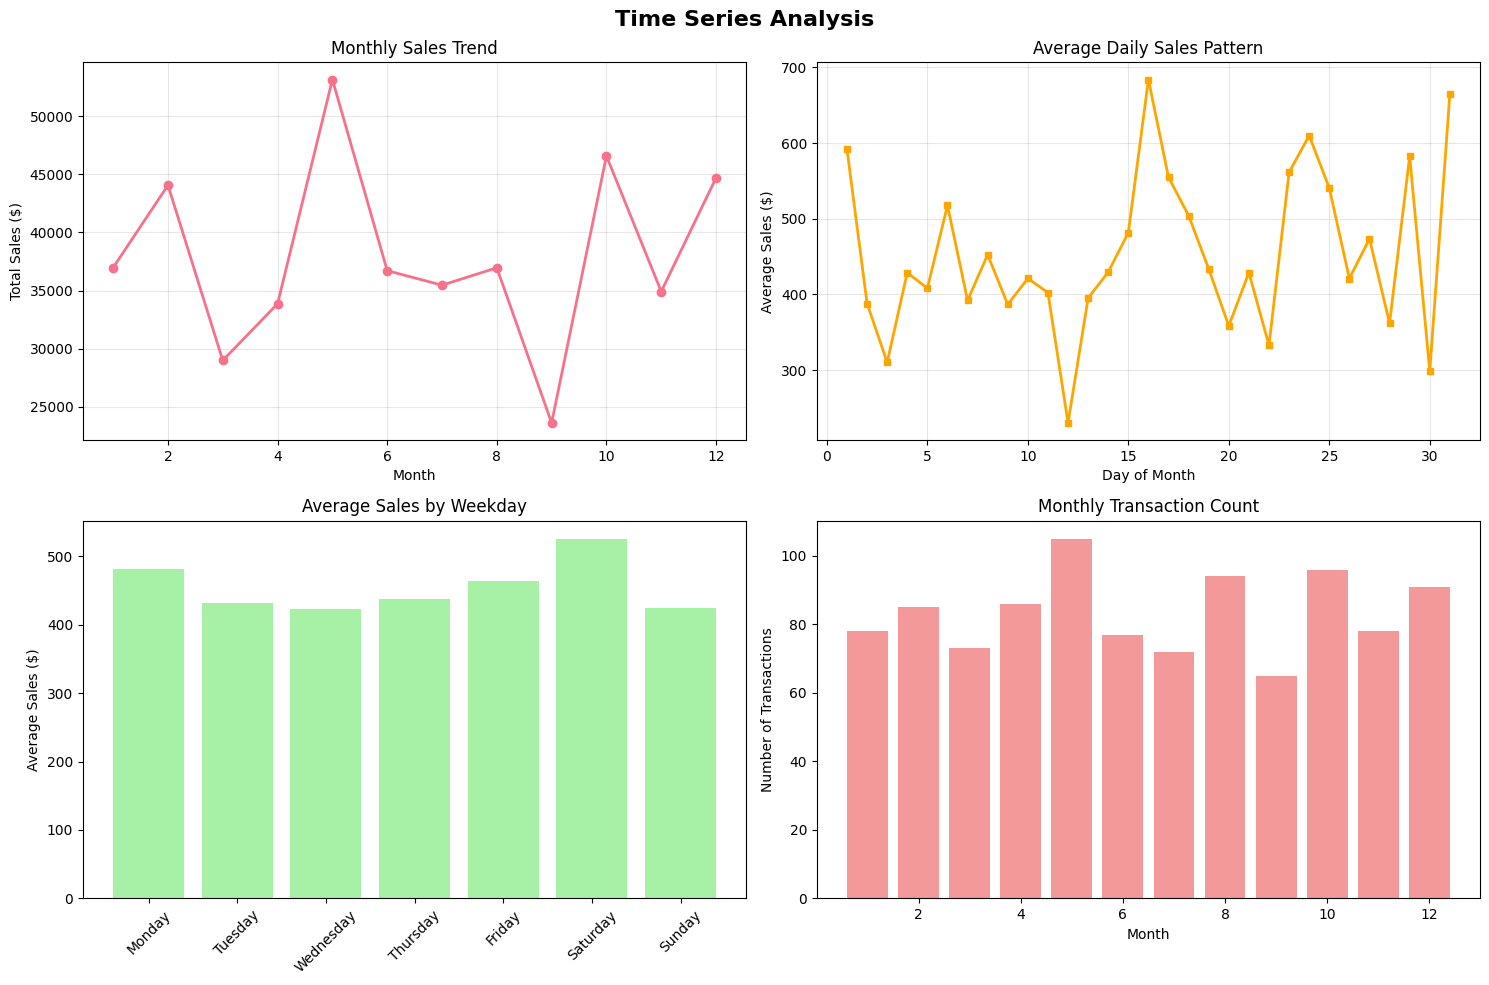


4. CUSTOMER AND PRODUCT ANALYSIS
----------------------------------------
Gender Analysis:
        Total_Revenue  Avg_Transaction  Transaction_Count  Avg_Quantity  \
Gender                                                                    
Female         232840           456.55                510          2.55   
Male           223160           455.43                490          2.48   

        Avg_Age  
Gender           
Female    41.36  
Male      41.43  

Product Category Analysis:
                  Total_Revenue  Avg_Transaction  Transaction_Count  \
Product Category                                                      
Beauty                   143515           467.48                307   
Clothing                 155580           443.25                351   
Electronics              156905           458.79                342   

                  Avg_Quantity  Total_Quantity  Avg_Price  
Product Category                                           
Beauty                    2.51 

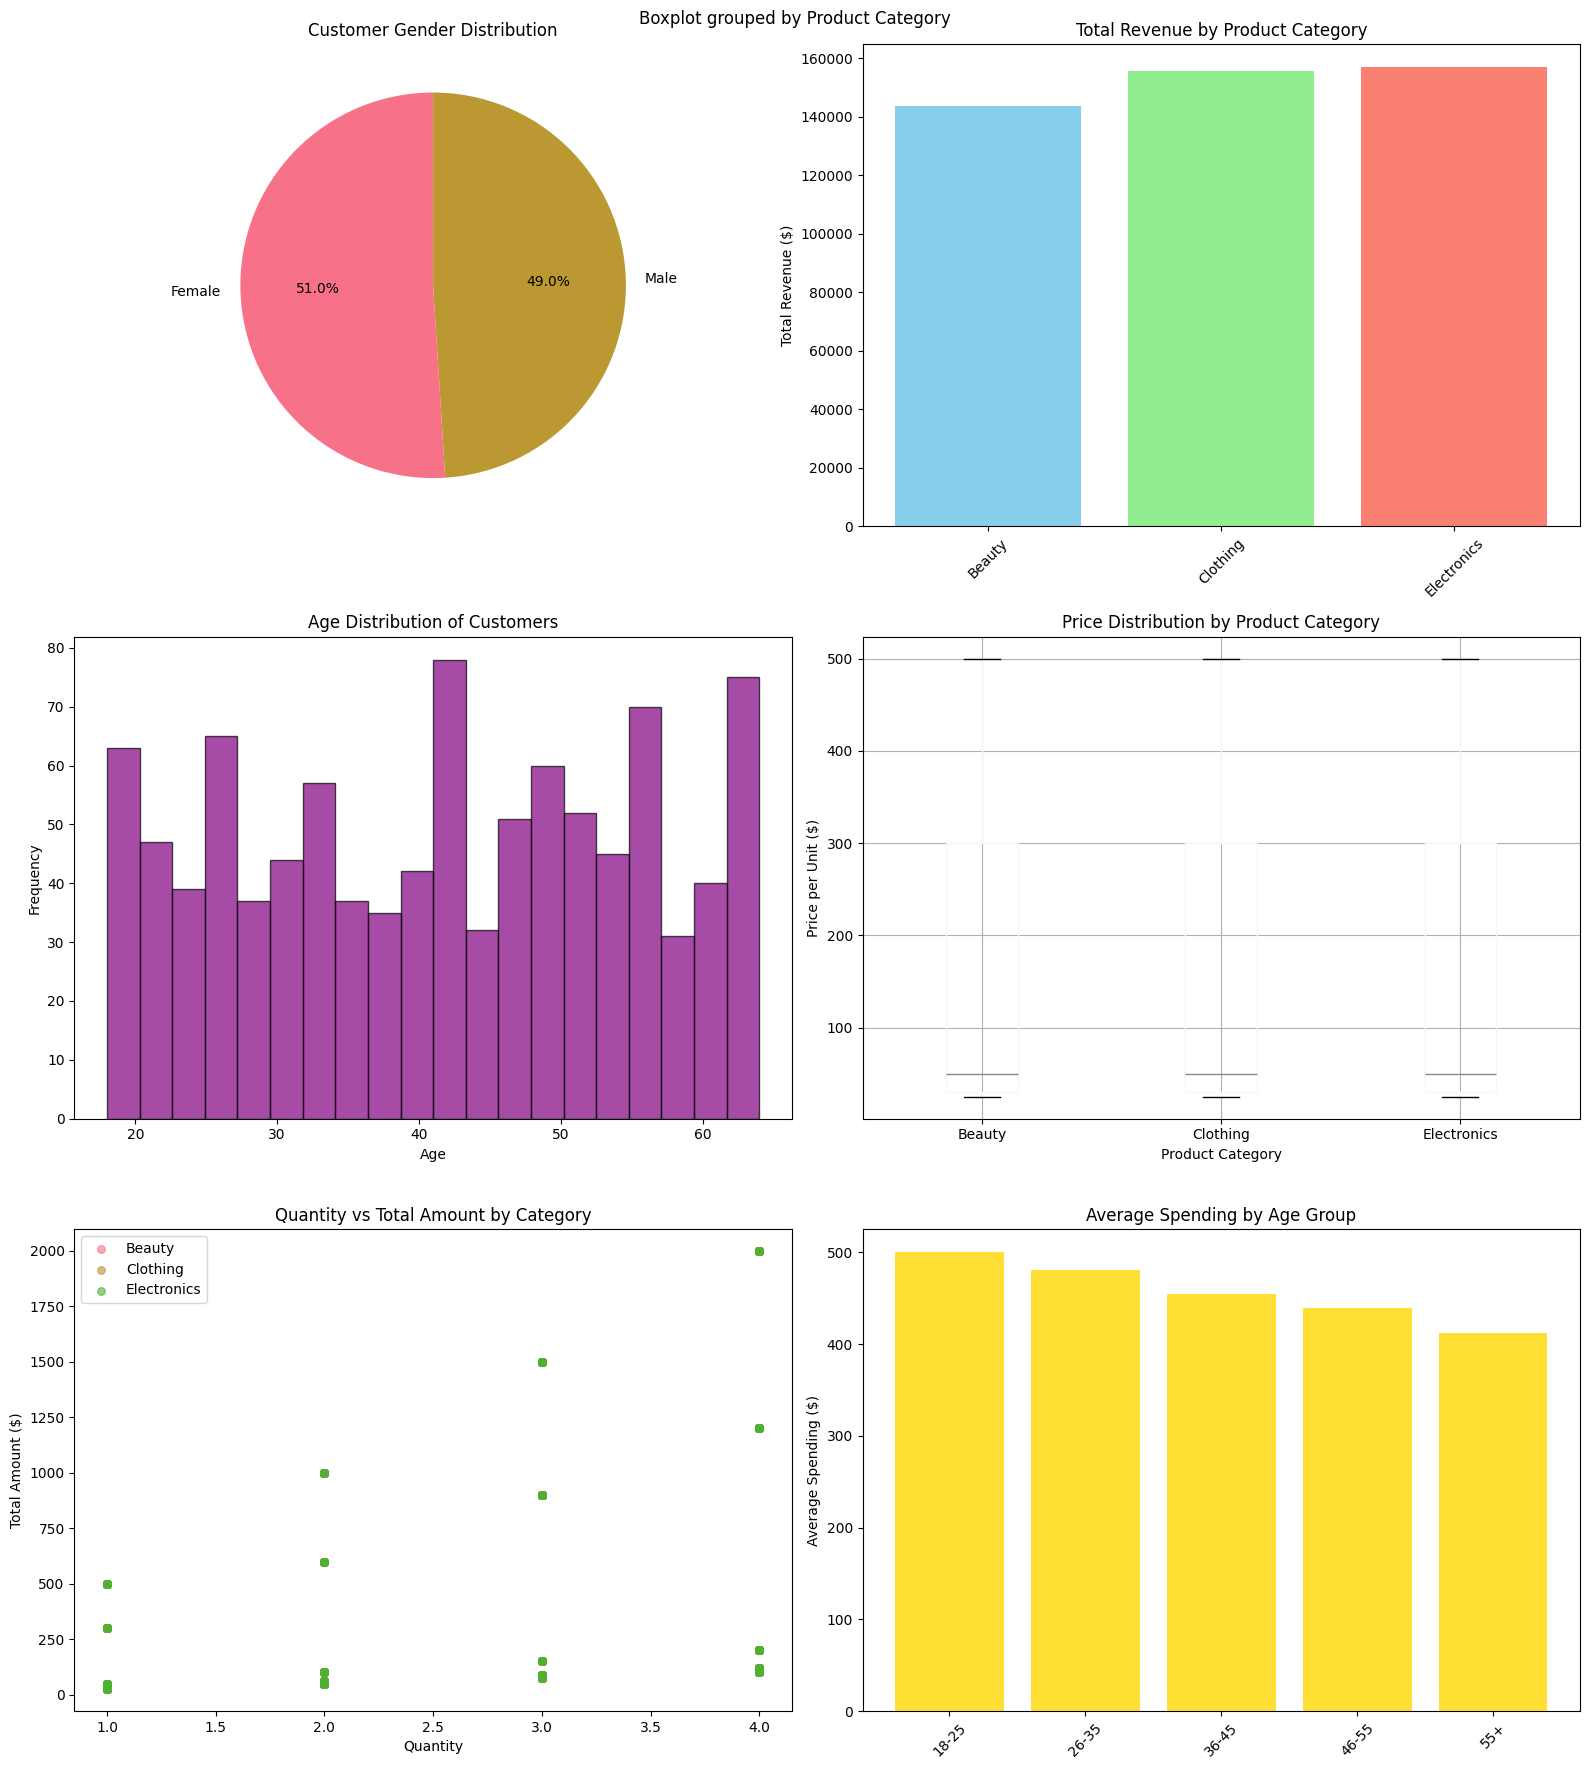


6. CORRELATION ANALYSIS
----------------------------------------
Correlation Matrix:
                  Age  Quantity  Price per Unit  Total Amount
Age             1.000    -0.024          -0.038        -0.061
Quantity       -0.024     1.000           0.018         0.374
Price per Unit -0.038     0.018           1.000         0.852
Total Amount   -0.061     0.374           0.852         1.000


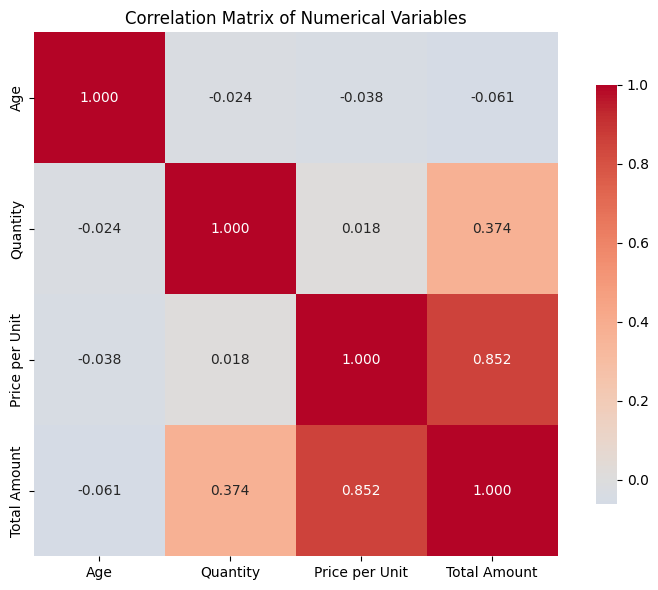


7. KEY INSIGHTS AND PATTERNS
----------------------------------------
Top 10 Customers by Total Spending:
1. CUST015: $2000.00
2. CUST412: $2000.00
3. CUST970: $2000.00
4. CUST547: $2000.00
5. CUST281: $2000.00
6. CUST416: $2000.00
7. CUST420: $2000.00
8. CUST927: $2000.00
9. CUST447: $2000.00
10. CUST342: $2000.00

Product Category Performance:

Beauty:
  - Total Revenue: $143,515.00
  - Average Transaction: $467.48
  - Transaction Count: 307
  - Average Quantity: 2.51

Clothing:
  - Total Revenue: $155,580.00
  - Average Transaction: $443.25
  - Transaction Count: 351
  - Average Quantity: 2.55

Electronics:
  - Total Revenue: $156,905.00
  - Average Transaction: $458.79
  - Transaction Count: 342
  - Average Quantity: 2.48

Seasonal Patterns:
Peak sales month: May ($53,150.00)
Lowest sales month: September ($23,620.00)

Customer Segmentation Insights:
High-value customers (top 20%): 202 customers
Average age of high-value customers: 39.8 years
Gender split in high-value segment: {'

In [ ]:
# Retail Sales Exploratory Data Analysis (EDA)
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("="*60)
print("RETAIL SALES EXPLORATORY DATA ANALYSIS")
print("="*60)

# 1. DATA LOADING AND CLEANING
print("\n1. DATA LOADING AND CLEANING")
print("-" * 40)

# Load the dataset
df = pd.read_csv('/content/retail_sales_dataset.csv ')

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Display basic information about the dataset
print("\nDataset Info:")
print(df.info())

print("\nFirst 5 rows:")
print(df.head())

# Check for missing values
print(f"\nMissing values:\n{df.isnull().sum()}")

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract additional time features for analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.day_name()

print("\nData cleaning completed successfully!")

# 2. DESCRIPTIVE STATISTICS
print("\n2. DESCRIPTIVE STATISTICS")
print("-" * 40)

# Basic statistics for numerical columns
print("Descriptive Statistics for Numerical Columns:")
numerical_cols = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
print(df[numerical_cols].describe())

# Statistics for categorical columns
print("\nCategorical Variables Summary:")
categorical_cols = ['Gender', 'Product Category']
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

# Age distribution statistics
print(f"\nAge Distribution:")
print(f"Mean Age: {df['Age'].mean():.2f}")
print(f"Median Age: {df['Age'].median():.2f}")
print(f"Age Range: {df['Age'].min()} - {df['Age'].max()}")

# Revenue statistics
print(f"\nRevenue Statistics:")
print(f"Total Revenue: ${df['Total Amount'].sum():,.2f}")
print(f"Average Transaction Value: ${df['Total Amount'].mean():.2f}")
print(f"Median Transaction Value: ${df['Total Amount'].median():.2f}")

# 3. TIME SERIES ANALYSIS
print("\n3. TIME SERIES ANALYSIS")
print("-" * 40)

# Monthly sales trend
monthly_sales = df.groupby(['Year', 'Month']).agg({
    'Total Amount': ['sum', 'mean', 'count']
}).round(2)
monthly_sales.columns = ['Total_Sales', 'Avg_Transaction', 'Transaction_Count']
monthly_sales = monthly_sales.reset_index()

print("Monthly Sales Summary (2023):")
print(monthly_sales)

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Time Series Analysis', fontsize=16, fontweight='bold')

# Monthly sales trend
monthly_trend = df.groupby('Month')['Total Amount'].sum()
axes[0, 0].plot(monthly_trend.index, monthly_trend.values, marker='o', linewidth=2, markersize=6)
axes[0, 0].set_title('Monthly Sales Trend')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Total Sales ($)')
axes[0, 0].grid(True, alpha=0.3)

# Daily sales pattern
daily_sales = df.groupby('Day')['Total Amount'].mean()
axes[0, 1].plot(daily_sales.index, daily_sales.values, marker='s', color='orange', linewidth=2, markersize=4)
axes[0, 1].set_title('Average Daily Sales Pattern')
axes[0, 1].set_xlabel('Day of Month')
axes[0, 1].set_ylabel('Average Sales ($)')
axes[0, 1].grid(True, alpha=0.3)

# Weekday analysis
weekday_sales = df.groupby('Weekday')['Total Amount'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
axes[1, 0].bar(weekday_sales.index, weekday_sales.values, color='lightgreen', alpha=0.8)
axes[1, 0].set_title('Average Sales by Weekday')
axes[1, 0].set_ylabel('Average Sales ($)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Transaction count over months
monthly_count = df.groupby('Month')['Transaction ID'].count()
axes[1, 1].bar(monthly_count.index, monthly_count.values, color='lightcoral', alpha=0.8)
axes[1, 1].set_title('Monthly Transaction Count')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Number of Transactions')

plt.tight_layout()
plt.show()

# 4. CUSTOMER AND PRODUCT ANALYSIS
print("\n4. CUSTOMER AND PRODUCT ANALYSIS")
print("-" * 40)

# Gender analysis
gender_analysis = df.groupby('Gender').agg({
    'Total Amount': ['sum', 'mean', 'count'],
    'Quantity': 'mean',
    'Age': 'mean'
}).round(2)
gender_analysis.columns = ['Total_Revenue', 'Avg_Transaction', 'Transaction_Count', 'Avg_Quantity', 'Avg_Age']
print("Gender Analysis:")
print(gender_analysis)

# Product category analysis
category_analysis = df.groupby('Product Category').agg({
    'Total Amount': ['sum', 'mean', 'count'],
    'Quantity': ['mean', 'sum'],
    'Price per Unit': 'mean'
}).round(2)
category_analysis.columns = ['Total_Revenue', 'Avg_Transaction', 'Transaction_Count', 'Avg_Quantity', 'Total_Quantity', 'Avg_Price']
print("\nProduct Category Analysis:")
print(category_analysis)

# Age group analysis
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 100],
                        labels=['18-25', '26-35', '36-45', '46-55', '55+'])
age_group_analysis = df.groupby('Age_Group').agg({
    'Total Amount': ['sum', 'mean', 'count'],
    'Quantity': 'mean'
}).round(2)
age_group_analysis.columns = ['Total_Revenue', 'Avg_Transaction', 'Transaction_Count', 'Avg_Quantity']
print("\nAge Group Analysis:")
print(age_group_analysis)

# 5. ADVANCED VISUALIZATIONS
print("\n5. CREATING DETAILED VISUALIZATIONS")
print("-" * 40)

# Create comprehensive visualization dashboard
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('Customer and Product Analysis Dashboard', fontsize=16, fontweight='bold')

# Gender distribution
gender_counts = df['Gender'].value_counts()
axes[0, 0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Customer Gender Distribution')

# Product category revenue
category_revenue = df.groupby('Product Category')['Total Amount'].sum()
axes[0, 1].bar(category_revenue.index, category_revenue.values, color=['skyblue', 'lightgreen', 'salmon'])
axes[0, 1].set_title('Total Revenue by Product Category')
axes[0, 1].set_ylabel('Total Revenue ($)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Age distribution histogram
axes[1, 0].hist(df['Age'], bins=20, color='purple', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Age Distribution of Customers')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Frequency')

# Price distribution by category
df.boxplot(column='Price per Unit', by='Product Category', ax=axes[1, 1])
axes[1, 1].set_title('Price Distribution by Product Category')
axes[1, 1].set_xlabel('Product Category')
axes[1, 1].set_ylabel('Price per Unit ($)')

# Quantity vs Total Amount scatter plot
for category in df['Product Category'].unique():
    subset = df[df['Product Category'] == category]
    axes[2, 0].scatter(subset['Quantity'], subset['Total Amount'],
                      label=category, alpha=0.6, s=30)
axes[2, 0].set_xlabel('Quantity')
axes[2, 0].set_ylabel('Total Amount ($)')
axes[2, 0].set_title('Quantity vs Total Amount by Category')
axes[2, 0].legend()

# Age group spending pattern
age_spending = df.groupby('Age_Group')['Total Amount'].mean()
axes[2, 1].bar(age_spending.index, age_spending.values, color='gold', alpha=0.8)
axes[2, 1].set_title('Average Spending by Age Group')
axes[2, 1].set_ylabel('Average Spending ($)')
axes[2, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 6. CORRELATION ANALYSIS
print("\n6. CORRELATION ANALYSIS")
print("-" * 40)

# Correlation matrix for numerical variables
numerical_df = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']]
correlation_matrix = numerical_df.corr()

print("Correlation Matrix:")
print(correlation_matrix.round(3))

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

# 7. KEY INSIGHTS AND PATTERNS
print("\n7. KEY INSIGHTS AND PATTERNS")
print("-" * 40)

# Top customers by spending
top_customers = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10)
print("Top 10 Customers by Total Spending:")
for i, (customer, amount) in enumerate(top_customers.items(), 1):
    print(f"{i}. {customer}: ${amount:.2f}")

# Product performance
print(f"\nProduct Category Performance:")
for category in df['Product Category'].unique():
    cat_data = df[df['Product Category'] == category]
    print(f"\n{category}:")
    print(f"  - Total Revenue: ${cat_data['Total Amount'].sum():,.2f}")
    print(f"  - Average Transaction: ${cat_data['Total Amount'].mean():.2f}")
    print(f"  - Transaction Count: {len(cat_data)}")
    print(f"  - Average Quantity: {cat_data['Quantity'].mean():.2f}")

# Seasonal patterns
print(f"\nSeasonal Patterns:")
seasonal_sales = df.groupby('Month_Name')['Total Amount'].sum()
peak_month = seasonal_sales.idxmax()
lowest_month = seasonal_sales.idxmin()
print(f"Peak sales month: {peak_month} (${seasonal_sales.max():,.2f})")
print(f"Lowest sales month: {lowest_month} (${seasonal_sales.min():,.2f})")

# Customer segments
print(f"\nCustomer Segmentation Insights:")
high_value = df[df['Total Amount'] >= df['Total Amount'].quantile(0.8)]
print(f"High-value customers (top 20%): {len(high_value)} customers")
print(f"Average age of high-value customers: {high_value['Age'].mean():.1f} years")
print(f"Gender split in high-value segment: {high_value['Gender'].value_counts().to_dict()}")

# 8. BUSINESS RECOMMENDATIONS
print("\n8. BUSINESS RECOMMENDATIONS")
print("-" * 40)

recommendations = [
    "1. CUSTOMER TARGETING:",
    f"   - Focus marketing on the {df['Gender'].value_counts().index[0].lower()} demographic ({df['Gender'].value_counts().iloc[0]/len(df)*100:.1f}% of customers)",
    f"   - Target age group {df.groupby('Age_Group')['Total Amount'].sum().idxmax()} for highest revenue potential",

    "\n2. PRODUCT STRATEGY:",
    f"   - {category_analysis['Total_Revenue'].idxmax()} generates highest revenue (${category_analysis['Total_Revenue'].max():,.2f})",
    f"   - Consider expanding {category_analysis['Avg_Transaction'].idxmax()} category (highest avg transaction: ${category_analysis['Avg_Transaction'].max():.2f})",

    "\n3. SEASONAL PLANNING:",
    f"   - Increase inventory for {peak_month} (peak sales month)",
    f"   - Develop promotional campaigns for {lowest_month} (lowest sales month)",

    "\n4. PRICING OPTIMIZATION:",
    f"   - Average transaction value is ${df['Total Amount'].mean():.2f}",
    f"   - Consider bundle deals to increase average quantity per transaction ({df['Quantity'].mean():.1f} items)",

    "\n5. CUSTOMER RETENTION:",
    "   - Implement loyalty programs for high-value customers",
    "   - Develop targeted campaigns for different age groups based on spending patterns"
]

for recommendation in recommendations:
    print(recommendation)

print("\n" + "="*60)
print("ANALYSIS COMPLETED SUCCESSFULLY!")
print("="*60)